# Historical Data for lime prices in Virudhunagar District

Let's take a look at how the prices for lime have changed over time in Virudhunagar district. We will use the data I obtained from agmarknet for this analysis.

## Import Data and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data/lime_prices_vdx_organized.csv', parse_dates=['Price Date'])
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Virudhunagar,Aruppukottai(Uzhavar Sandhai ),Lime,Lime,Local,1500,16000,16000,2025-05-17
1,2,Virudhunagar,Aruppukottai(Uzhavar Sandhai ),Lime,Lime,Local,10000,12000,12000,2025-09-04
2,3,Virudhunagar,Aruppukottai(Uzhavar Sandhai ),Lime,Lime,Local,10000,12000,12000,2025-09-05
3,4,Virudhunagar,Aruppukottai(Uzhavar Sandhai ),Lime,Lime,Local,10000,12000,12000,2025-09-11
4,5,Virudhunagar,Aruppukottai(Uzhavar Sandhai ),Lime,Lime,Local,10000,12000,12000,2025-07-12


In [3]:
# Examine the date range of the data
print(f"Data ranges from {data['Price Date'].min().date()} to {data['Price Date'].max().date()}")

Data ranges from 2024-07-16 to 2025-10-24


## Data Cleaning and Prep

In [4]:
# Let's segment the data into different markets
markets = data['Market Name'].unique()
markets

array(['Aruppukottai(Uzhavar Sandhai )', 'Rajapalayam(Uzhavar Sandhai )',
       'Sivakasi(Uzhavar Sandhai )', 'Srivilliputhur(Uzhavar Sandhai )',
       'Thalavaipuram(Uzhavar Sandhai )',
       'Virudhunagar(Uzhavar Sandhai )'], dtype=object)

In [5]:
# Let's get rid of the berboseness of the market names
data['Market Name'] = data['Market Name'].str.replace('(Uzhavar Sandhai )', '', regex=False)
markets = data['Market Name'].unique()
markets

array(['Aruppukottai', 'Rajapalayam', 'Sivakasi', 'Srivilliputhur',
       'Thalavaipuram', 'Virudhunagar'], dtype=object)

In [6]:
# Also get rid of (Rs./Quintal) in data headers
data.columns = [col.replace(' (Rs./Quintal)', '') for col in data.columns]
# One of the markets - has no data - so we can eleminate that
markets = markets[:-1] # No data in the last market so we can eliminate that
data.head()


,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price,Max Price,Modal Price,Price Date
0,1,Virudhunagar,Aruppukottai,Lime,Lime,Local,1500,16000,16000,2025-05-17
1,2,Virudhunagar,Aruppukottai,Lime,Lime,Local,10000,12000,12000,2025-09-04
2,3,Virudhunagar,Aruppukottai,Lime,Lime,Local,10000,12000,12000,2025-09-05
3,4,Virudhunagar,Aruppukottai,Lime,Lime,Local,10000,12000,12000,2025-09-11
4,5,Virudhunagar,Aruppukottai,Lime,Lime,Local,10000,12000,12000,2025-07-12


Okay, it looks good now to do some visualizations and analysis.

## Data Visualization

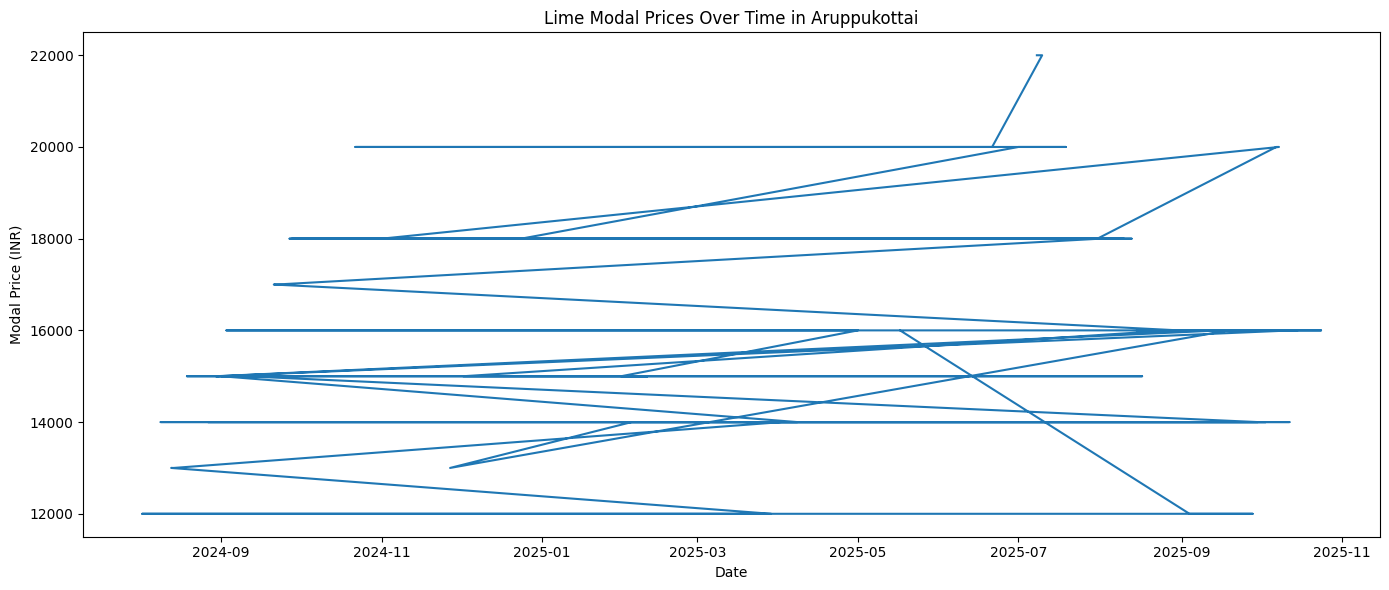

In [7]:
# Let's do a line plot for one of the markets
market_to_plot = markets[0]  # You can change the index to plot different markets
market_data = data[data['Market Name'] == market_to_plot]
plt.figure(figsize=(14, 6))
plt.plot(market_data['Price Date'], market_data['Modal Price'], color='C0')
plt.title(f'Lime Modal Prices Over Time in {market_to_plot}')
plt.xlabel('Date')
plt.ylabel('Modal Price (INR)')
plt.tight_layout()
plt.show()


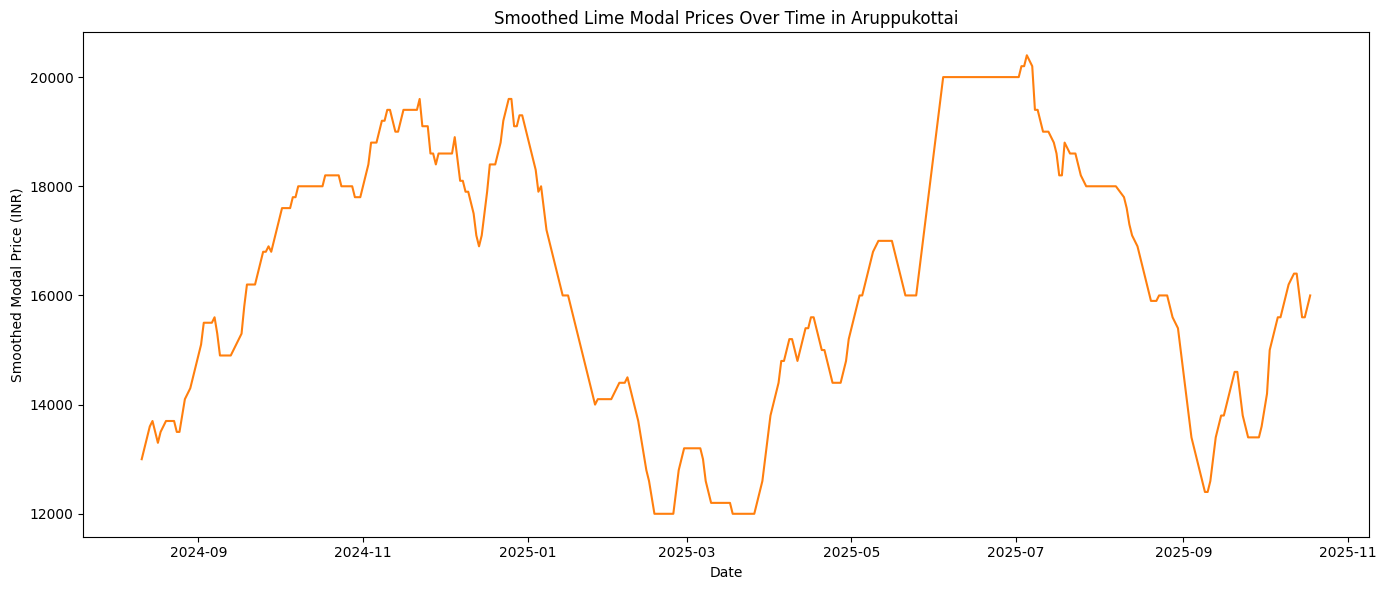

In [8]:
# Let's smooth the data and then plot it
market_data = market_data.sort_values('Price Date').copy()
market_data['Smoothed Price'] = market_data['Modal Price'].rolling(window=10, center=True).mean()
plt.figure(figsize=(14, 6))
plt.plot(market_data['Price Date'], market_data['Smoothed Price'], color='C1')
plt.title(f'Smoothed Lime Modal Prices Over Time in {market_to_plot}')
plt.xlabel('Date')
plt.ylabel('Smoothed Modal Price (INR)')
plt.tight_layout()
plt.show()


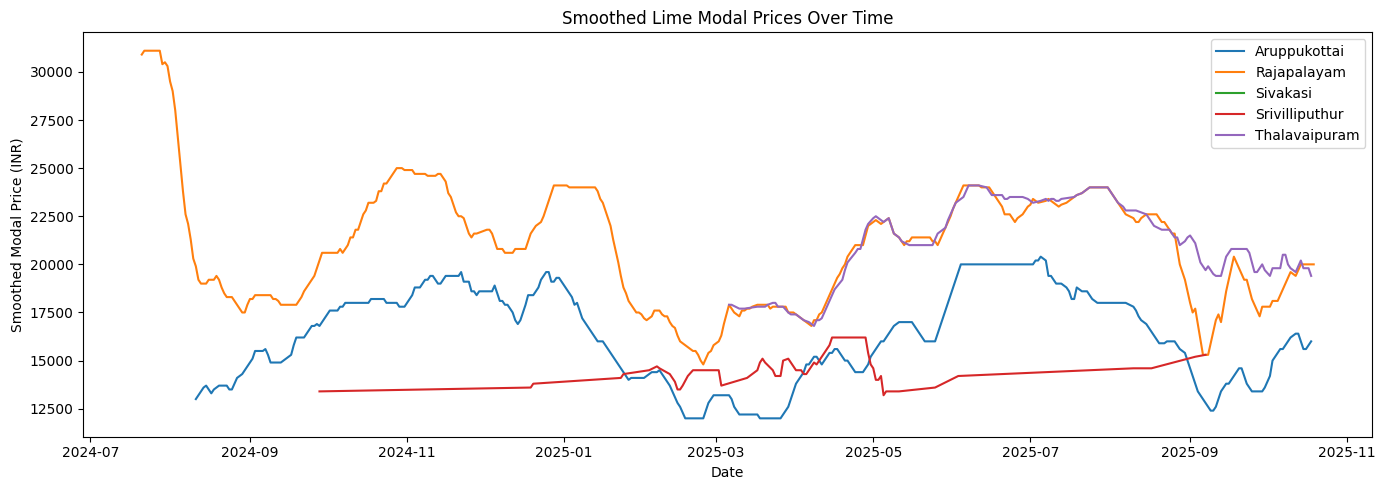

In [9]:
# Let's plot for all markets - in the same plot
plt.figure(figsize=(14, 5))
for market in markets:
    market_data = data[data['Market Name'] == market].sort_values('Price Date').copy()
    market_data['Smoothed Price'] = market_data['Modal Price'].rolling(window=10, center=True).mean()
    plt.plot(market_data['Price Date'], market_data['Smoothed Price'], label=market)
plt.title('Smoothed Lime Modal Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Smoothed Modal Price (INR)')
plt.legend()
plt.tight_layout()
plt.show()


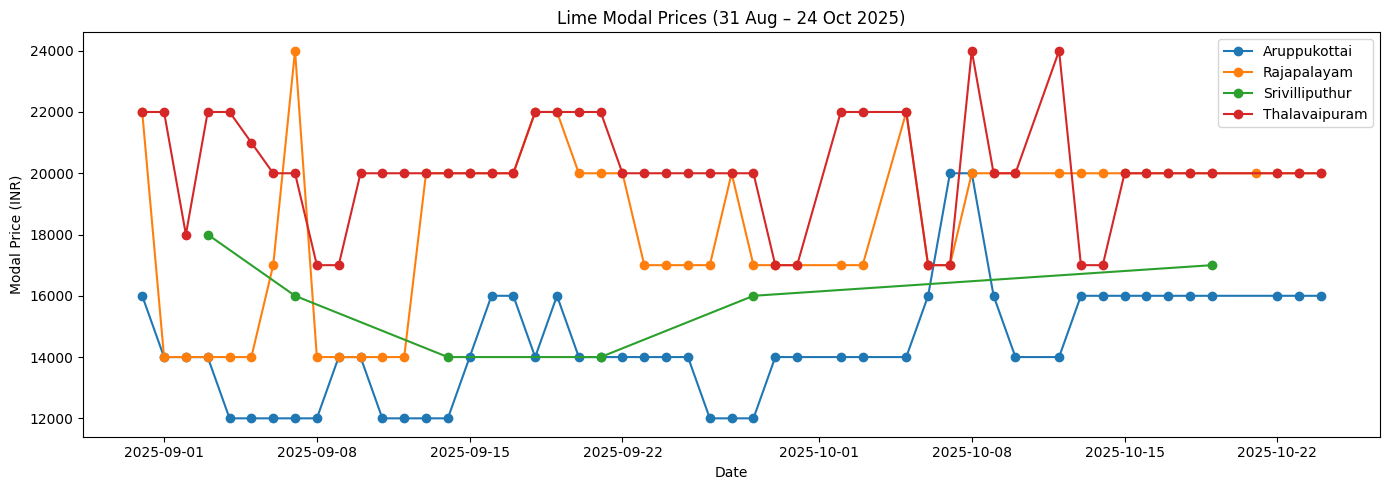

In [10]:
# Same plot from 31 Aug to 24 Oct 2025 (unsmoothed)
start_date = pd.to_datetime('2025-08-31')
end_date = pd.to_datetime('2025-10-24')
filtered = data[(data['Price Date'] >= start_date) & (data['Price Date'] <= end_date)].copy()
plt.figure(figsize=(14, 5))
for market in markets:
    market_data = filtered[filtered['Market Name'] == market].sort_values('Price Date')
    if market_data.empty:
        continue
    plt.plot(market_data['Price Date'], market_data['Modal Price'], marker='o', label=market)
plt.title('Lime Modal Prices (31 Aug – 24 Oct 2025)')
plt.xlabel('Date')
plt.ylabel('Modal Price (INR)')
plt.legend()
plt.tight_layout()
plt.show()
